# Louisville Crime Data

## Import Packages

In [690]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Read and create a dataframe

In [691]:

df_2024 = pd.read_csv('/Users/jonmarklarson/Projects/lou_crime_report/data/Crime_Data_2024.csv')

## Understanding and cleaning the data

From the review below the data appears to be clean and ready for basic EDA with 0 duplicate values and no columns that need removal or combination. The total rows are +70K across 16 columns. Some considerations and notes for enhancement in the future are below:

The data types are mostly objects. I believe I need to change some columns to integers such as zip_code or badge_id to be workable, but then again these aren't performance numbers for mathmatecial calculation.

I could separate the date_reported / date_occurred into new columns where the month and year are separated out so that it's easier to build charts and tables for those dimensions.

I also need to combine all downladed data into one file so that I can see more valuable trends over time. 

In [692]:
df_2024.head()

,incident_number,date_reported,date_occurred,badge_id,offense_classification,offense_code_name,nibrs_code,nibrs_group_name,was_offense_completed,lmpd_division,lmpd_beat,location_category,block_address,city,zip_code,ObjectId
0,LMPD25144947,12/5/2025 5:28:00 PM,11/16/2024 5:00:00 AM,8701.0,29 FRAUD IMPERSONATION,THEFT OF IDENTITY OF ANOTHER WITHOUT CONSENT 5...,26C,A,YES,4TH DIVISION,424,RESIDENCE/HOME,500 BLOCK LONGFIELD AVE,LOUISVILLE,40215,1
1,LMPD25140113,11/24/2025 4:22:00 AM,7/9/2024 4:00:00 AM,8631.0,29 FRAUD IMPERSONATION,THEFT OF IDENTITY OF ANOTHER WITHOUT CONSENT 5...,26C,A,YES,8TH DIVISION,824,RESIDENCE/HOME,100 BLOCK LA FONTENAY DR,DOUGLASS HILLS,40223,2
2,LMPD25139843,11/23/2025 2:37:00 PM,11/15/2024 9:00:00 PM,8560.0,14 AUTO THEFT,"TBUT OR DISP AUTO $1,000 < $10,000 514.030 241...",240,A,YES,2ND DIVISION,223,HIGHWAY/ ROAD/ ALLEY/ STREET/ SIDEWALK,1300 BLOCK S 26TH ST,LOUISVILLE,40210,3
3,LMPD25138669,11/20/2025 8:54:00 PM,1/1/2024 5:01:00 AM,8646.0,29 FRAUD IMPERSONATION,THEFT OF IDENTITY OF ANOTHER WITHOUT CONSENT 5...,26C,A,YES,1ST DIVISION,111,RESIDENCE/HOME,2400 BLOCK NORTHWESTERN PKWY,LOUISVILLE,40212,4
4,LMPD25138625,11/20/2025 7:29:00 PM,10/29/2024 4:00:00 PM,8544.0,23 THEFT OTHER,"THEFT BY DECEPTION INCLUDING COLD CHECKS $1,00...",23H,A,YES,3RD DIVISION,323,RESIDENCE/HOME,200 BLOCK ANGELETTA WAY,LOUISVILLE,40214,5


In [693]:
df_2024.info

<bound method DataFrame.info of       incident_number           date_reported          date_occurred  \
0        LMPD25144947    12/5/2025 5:28:00 PM  11/16/2024 5:00:00 AM   
1        LMPD25140113   11/24/2025 4:22:00 AM    7/9/2024 4:00:00 AM   
2        LMPD25139843   11/23/2025 2:37:00 PM  11/15/2024 9:00:00 PM   
3        LMPD25138669   11/20/2025 8:54:00 PM    1/1/2024 5:01:00 AM   
4        LMPD25138625   11/20/2025 7:29:00 PM  10/29/2024 4:00:00 PM   
...               ...                     ...                    ...   
70763    LMPD23107772    11/5/2023 7:35:00 PM  3/30/2024 12:00:00 AM   
70764    LMPD23106029   11/1/2023 12:27:00 PM  1/10/2024 10:15:00 PM   
70765    LMPD23120768    11/1/2023 4:00:00 AM   2/15/2024 6:04:00 PM   
70766    LMPD23104184   10/27/2023 1:57:00 PM  1/10/2024 10:40:00 PM   
70767    LMPD23104309  10/26/2023 10:00:00 PM   4/11/2024 2:49:00 PM   

       badge_id  offense_classification  \
0        8701.0  29 FRAUD IMPERSONATION   
1        8631.0  

In [694]:
df_2024.shape

(70768, 16)

In [695]:
df_2024.dtypes

incident_number            object
date_reported              object
date_occurred              object
badge_id                  float64
offense_classification     object
offense_code_name          object
nibrs_code                 object
nibrs_group_name           object
was_offense_completed      object
lmpd_division              object
lmpd_beat                  object
location_category          object
block_address              object
city                       object
zip_code                   object
ObjectId                    int64
dtype: object

### Duplicate values?

In [696]:
df_2024.duplicated().sum()

0

In [697]:
df_2024[df_2024.duplicated(keep=False)]

,incident_number,date_reported,date_occurred,badge_id,offense_classification,offense_code_name,nibrs_code,nibrs_group_name,was_offense_completed,lmpd_division,lmpd_beat,location_category,block_address,city,zip_code,ObjectId


## EDA work

As I have begun exploring and visualizing, the category of 'all other offenses' is the highest offense_category indicating that there is a lot of unknown crime or research that needs to occur on what is defined within that group. Is it parking tickets?

- Q: Do we see a trend in badge_id by offense? Are there specific badge_id that tend to report certain offenses? Does it correlate to zip code?
- Q: Have certain offenses increased or declines since 2003?
- Q: What crime policies or events have caused offenses to shift over the years?

In [698]:
df_2024['offense_classification'].value_counts()


56 ALL OTHER OFFENSES        8229
11 SIMPLE ASSAULT            7266
24 VANDALISM                 6623
14 AUTO THEFT                5789
12 INTIMIDATION              4946
23 THEFT OTHER               4818
21 THEFT FR VEH              4027
13 BURGLARY                  3556
9 AGGRAVATED ASSAULT         3506
18 SHOPLIFTING               3220
34 NARCOTICS                 2784
23 LARCENY                   1973
46 FAMILY OFFENSES           1419
19 THEFT FR BLDG             1404
22 THEFT MV PARTS            1230
28 FRAUD CREDIT CARD/ATM     1090
33 STOLEN PROPERTY            976
8 ROBBERY                     973
35 NARCOTICS EQUIP            926
46 WPNS LAW VIOLATION         919
29 FRAUD IMPERSONATION        764
26 COUNTERFEITING             670
55 TRESPASSING                590
27 FRAUD                      449
99 NON-REPORTABLE             279
4 FORCIBLE RAPE               237
32 EMBEZZLEMENT               209
10 KIDNAPPING ONLY            201
7 FORCIBLE FONDLING           196
15 UNAUTHORIZE

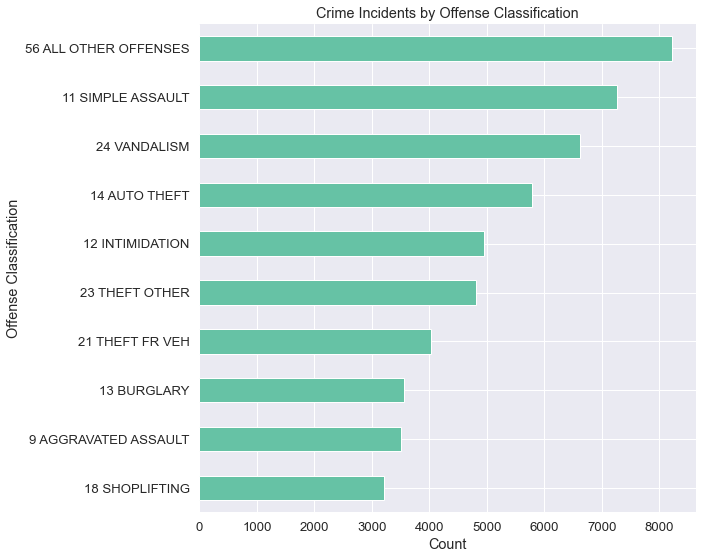

In [699]:
plt.figure(figsize=(10, 8))
df_2024['offense_classification'].value_counts().head(10)[::-1].plot(kind='barh')

plt.xlabel("Count")
plt.ylabel("Offense Classification")
plt.title("Crime Incidents by Offense Classification")

ax = plt.gca()
for spine in ax.spines.values():
    spine.set_linewidth(0.5)
    spine.set_alpha(0.5)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.tight_layout()
plt.show()



### What are 'All Other Offenses'?

"In crime datasets, 'All Other Offenses' (AOO) is a residual category for state/local law violations not specifically listed as major Part I or Part II crimes (like murder, theft, assault), but excluding traffic offenses, encompassing miscellaneous infractions like disorderly conduct, public intoxication, curfew violations, and other non-serious misdemeanors or local ordinance breaches, essentially catching everything else reported to police. 

What it includes (examples):
Disorderly Conduct: General public disturbance.
Drunkenness/Public Intoxication.
Curfew Violations: Especially for juveniles.
Loitering.
Trespassing (sometimes).
Vagrancy (in some systems).
Other minor violations of local ordinances or state laws not detailed elsewhere in the dataset."

In [700]:
auto_theft = df_2024[df_2024['offense_classification'] == '14 AUTO THEFT']
auto_theft['location_category'].value_counts()




PARKING/ DROP LOT/ GARAGE                 2099
RESIDENCE/HOME                            1846
HIGHWAY/ ROAD/ ALLEY/ STREET/ SIDEWALK    1103
OTHER RESIDENCE (APARTMENT/CONDO)          300
AUTO DEALERSHIP NEW/USED                    65
OTHER/UNKNOWN                               51
COMMERCIAL/OFFICE BUILDING                  45
HOTEL/ MOTEL/ ETC.                          41
SERVICE/GAS STATION                         41
PARK/ PLAYGROUND                            19
SPECIALTY STORE                             19
DRUG STORE/DOCTOR'S OFFICE/HOSPITAL         16
CONVENIENCE STORE                           16
RESTAURANT                                  14
CONSTRUCTION SITE                           12
RENTAL STORAGE FACILITY                     11
CHURCH/SYNAGOGUE/TEMPLE/MOSQUE              11
INDUSTRIAL SITE                             10
GROCERY/ SUPERMARKET                         9
BAR/NIGHTCLUB                                7
SHELTER - MISSION/ HOMELESS                  6
SCHOOL - ELEM

# Advanced Data Viz - week 4 progress
- In the work below I clean and join all the datasets together, experiment with a seaborn style template for clean visuals, and begin theorizing new questions from a timeline chart.
- The data is clean and visuals improved, although more is to be done soon.

### Apply a Seaborn style to matplotlib (experimenting)

In [701]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [702]:
plt.style.use('seaborn-bright')
sns.set_context("notebook", font_scale=1.2)
sns.set_palette("Set2")


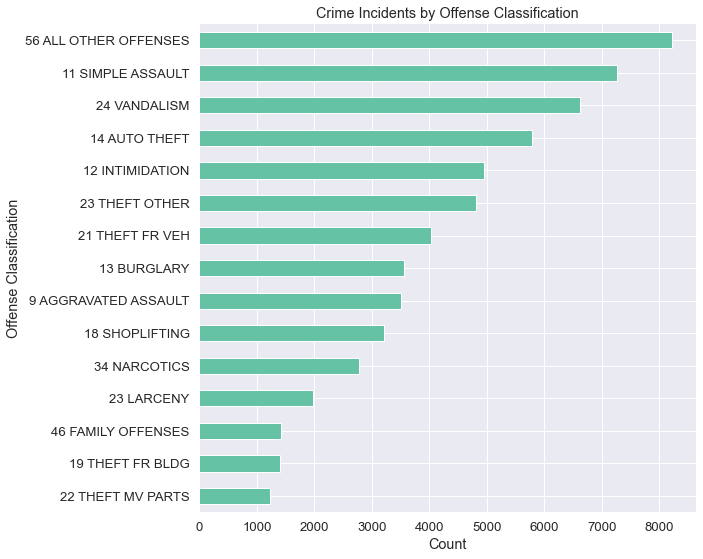

In [703]:
plt.figure(figsize=(10, 8))
df_2024['offense_classification'].value_counts().head(15)[::-1].plot(kind='barh')

plt.xlabel("Count")
plt.ylabel("Offense Classification")
plt.title("Crime Incidents by Offense Classification")

ax = plt.gca()
for spine in ax.spines.values():
    spine.set_linewidth(0.5)
    spine.set_alpha(0.5)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.tight_layout()
plt.show()

## Combining the datasets and adding a year column

- Much of the code is not together in one cell because I needed to see the column structure on top of each other step-by-step. Could be revised.
- Dropped ID and ObjectID columns due to ordering issues, redundancy, and lack of utility.
- Badge IDs weren't assigned until 2023 so older numbers are NaN (Policy change due to BT?)



### Adding a year column to each file

In [704]:
df_2003 = pd.read_csv('/Users/jonmarklarson/Projects/lou_crime_report/data/Crime_Data_2003.csv')
df_2003['year'] = 2003

df_2010 = pd.read_csv('/Users/jonmarklarson/Projects/lou_crime_report/data/Crime_Data_2010.csv')
df_2010['year'] = 2010

df_2019 = pd.read_csv('/Users/jonmarklarson/Projects/lou_crime_report/data/Crime_Data_2019.csv')
df_2019['year'] = 2019

df_2023 = pd.read_csv('/Users/jonmarklarson/Projects/lou_crime_report/data/Crime_Data_2023.csv')
df_2023['year'] = 2023

df_2024 = pd.read_csv('/Users/jonmarklarson/Projects/lou_crime_report/data/Crime_Data_2024.csv')
df_2024['year'] = 2024

df_2025 = pd.read_csv('/Users/jonmarklarson/Projects/lou_crime_report/data/Crime_Data_2025.csv')
df_2025['year'] = 2025

/Users/jonmarklarson/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/Users/jonmarklarson/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (14) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [705]:
# Check Results

df_2003.head(8)

,INCIDENT_NUMBER,DATE_REPORTED,DATE_OCCURED,UOR_DESC,CRIME_TYPE,NIBRS_CODE,UCR_HIERARCHY,ATT_COMP,LMPD_DIVISION,LMPD_BEAT,PREMISE_TYPE,BLOCK_ADDRESS,CITY,ZIP_CODE,ID,ObjectId,year
0,80-03-800034,11/4/03 4:20 AM,11/4/03 4:20 AM,LOITERING FOR PROSTITUTION PURPOSES - 2ND > OF...,DISTURBING THE PEACE,40B,PART II,COMPLETED,2ND DIVISION,223,HIGHWAY / ROAD / ALLEY,W KENTUCKY ST / S 16TH ST ...,LOUISVILLE,40210.0,18600,1,2003
1,80-03-800034,11/4/03 4:20 AM,11/4/03 4:20 AM,DISORDERLY CONDUCT,DISTURBING THE PEACE,90C,PART II,COMPLETED,2ND DIVISION,223,HIGHWAY / ROAD / ALLEY,W KENTUCKY ST / S 16TH ST ...,LOUISVILLE,40210.0,18601,2,2003
2,80-98-100100,1/13/98 11:30 AM,11/1/96 11:30 AM,MISSING PERSONS,OTHER,90Z,PART II,COMPLETED,1ST DIVISION,123,HIGHWAY / ROAD / ALLEY,S 4TH ST / W BROADWAY ...,LOUISVILLE,40202.0,52848,3,2003
3,80-03-642283,11/20/03 2:00 PM,11/20/03 2:00 AM,THEFT BY UNLAWFUL TAKING/DISP - FROM BUILDING ...,THEFT/LARCENY,23D,PART I,COMPLETED,4TH DIVISION,411,DRUG STORE/DR`S OFFICE/HOSPITAL,800 BLOCK S 6TH ST ...,LOUISVILLE,40203.0,114063,4,2003
4,80-07-059478,4/2/99 4:40 AM,4/2/99 4:00 AM,RAPE - 1ST DEGREE,SEX CRIMES,11A,PART I,COMPLETED,4TH DIVISION,411,HIGHWAY / ROAD / ALLEY,100 BLOCK E JACOB ST ...,LOUISVILLE,40202.0,220191,5,2003
5,80-07-059480,11/9/00 4:00 AM,11/8/00 4:00 PM,RAPE-2ND DEGREE-NO FORCE,SEX CRIMES,36B,PART II,COMPLETED,4TH DIVISION,435,RESIDENCE / HOME,4300 BLOCK TUSCARORA WAY ...,LOUISVILLE,40215.0,220192,6,2003
6,80-07-059483,1/1/01 6:00 PM,12/23/00 4:00 AM,RAPE - 1ST DEGREE,SEX CRIMES,11A,PART I,COMPLETED,4TH DIVISION,412,RESIDENCE / HOME,500 BLOCK WAINWRIGHT AVE ...,LOUISVILLE,40217.0,220311,7,2003
7,80-07-059483,1/1/01 6:00 PM,12/23/00 4:00 AM,SODOMY - 1ST DEGREE,OTHER,0,NaN,COMPLETED,4TH DIVISION,412,RESIDENCE / HOME,500 BLOCK WAINWRIGHT AVE ...,LOUISVILLE,40217.0,220312,8,2003


### Standardize column headers across all dataframes

In [706]:
# Dropped the ID column due to not being in recent years and lack of utility

df_2003 = df_2003.rename(columns={
    'INCIDENT_NUMBER': 'incident_number',
    'DATE_REPORTED': 'date_reported',
    'DATE_OCCURED': 'date_occurred',
    'UOR_DESC': 'offense_code_name',
    'CRIME_TYPE': 'offense_classification',
    'NIBRS_CODE': 'nibrs_code',
    'UCR_HIERARCHY': 'nibrs_group_name',
    'ATT_COMP': 'was_offense_completed',
    'LMPD_DIVISION': 'lmpd_division',
    'LMPD_BEAT': 'lmpd_beat',
    'PREMISE_TYPE': 'location_category',
    'BLOCK_ADDRESS': 'block_address',
    'CITY': 'city',
    'ZIP_CODE': 'zip_code',
    'ObjectId': 'ObjectId'
})

df_2003 = df_2003.drop(columns=['ID'])
df_2003 = df_2003.drop(columns=['ObjectId'])

df_2003.head()

,incident_number,date_reported,date_occurred,offense_code_name,offense_classification,nibrs_code,nibrs_group_name,was_offense_completed,lmpd_division,lmpd_beat,location_category,block_address,city,zip_code,year
0,80-03-800034,11/4/03 4:20 AM,11/4/03 4:20 AM,LOITERING FOR PROSTITUTION PURPOSES - 2ND > OF...,DISTURBING THE PEACE,40B,PART II,COMPLETED,2ND DIVISION,223,HIGHWAY / ROAD / ALLEY,W KENTUCKY ST / S 16TH ST ...,LOUISVILLE,40210.0,2003
1,80-03-800034,11/4/03 4:20 AM,11/4/03 4:20 AM,DISORDERLY CONDUCT,DISTURBING THE PEACE,90C,PART II,COMPLETED,2ND DIVISION,223,HIGHWAY / ROAD / ALLEY,W KENTUCKY ST / S 16TH ST ...,LOUISVILLE,40210.0,2003
2,80-98-100100,1/13/98 11:30 AM,11/1/96 11:30 AM,MISSING PERSONS,OTHER,90Z,PART II,COMPLETED,1ST DIVISION,123,HIGHWAY / ROAD / ALLEY,S 4TH ST / W BROADWAY ...,LOUISVILLE,40202.0,2003
3,80-03-642283,11/20/03 2:00 PM,11/20/03 2:00 AM,THEFT BY UNLAWFUL TAKING/DISP - FROM BUILDING ...,THEFT/LARCENY,23D,PART I,COMPLETED,4TH DIVISION,411,DRUG STORE/DR`S OFFICE/HOSPITAL,800 BLOCK S 6TH ST ...,LOUISVILLE,40203.0,2003
4,80-07-059478,4/2/99 4:40 AM,4/2/99 4:00 AM,RAPE - 1ST DEGREE,SEX CRIMES,11A,PART I,COMPLETED,4TH DIVISION,411,HIGHWAY / ROAD / ALLEY,100 BLOCK E JACOB ST ...,LOUISVILLE,40202.0,2003


In [707]:
# Did not rename 'ID' column from datasetdue to not being in more recent datasets and lack of utility

df_2010 = df_2010.rename(columns={
    'INCIDENT_NUMBER': 'incident_number',
    'DATE_REPORTED': 'date_reported',
    'DATE_OCCURED': 'date_occurred',
    'UOR_DESC': 'offense_code_name',
    'CRIME_TYPE': 'offense_classification',
    'NIBRS_CODE': 'nibrs_code',
    'UCR_HIERARCHY': 'nibrs_group_name',
    'ATT_COMP': 'was_offense_completed',
    'LMPD_DIVISION': 'lmpd_division',
    'LMPD_BEAT': 'lmpd_beat',
    'PREMISE_TYPE': 'location_category',
    'BLOCK_ADDRESS': 'block_address',
    'CITY': 'city',
    'ZIP_CODE': 'zip_code',
    'ObjectId': 'ObjectId'
})

df_2010 = df_2010.drop(columns=['ID'])
df_2010 = df_2010.drop(columns=['ObjectId'])
  
df_2010.head()

,incident_number,date_reported,date_occurred,offense_code_name,offense_classification,nibrs_code,nibrs_group_name,was_offense_completed,lmpd_division,lmpd_beat,location_category,block_address,city,zip_code,year
0,80-10-023517,4/2/10 5:07 PM,4/2/10 6:00 AM,MISSING PERSONS,OTHER,90Z,PART II,COMPLETED,6TH DIVISION,624,OTHER / UNKNOWN,5500 BLOCK RANDOM WAY ...,LOUISVILLE,40291,2010
1,80-10-024222,4/5/10 3:52 PM,4/3/10 9:00 PM,BURGLARY - 3RD DEGREE,BURGLARY,220,PART I,ATTEMPTED,3RD DIVISION,331,OTHER / UNKNOWN,4800 BLOCK KAUFMAN LN ...,LOUISVILLE,40216,2010
2,80-10-023611,4/3/10 1:40 AM,4/3/10 1:20 AM,DRUG PARAPHERNALIA-BUY/POSSESS-2ND OR > OFFENSE,DRUGS/ALCOHOL VIOLATIONS,35B,PART II,COMPLETED,6TH DIVISION,625,HIGHWAY / ROAD / ALLEY,FURMAN BLVD / ALLISON WAY ...,LOUISVILLE,40220,2010
3,80-10-010192,2/11/10 7:46 PM,2/11/10 7:46 PM,POSS CONTROLLED SUB 1ST DEGREE 1ST OFF (METHAM...,DRUGS/ALCOHOL VIOLATIONS,35A,PART II,COMPLETED,3RD DIVISION,331,RESIDENCE / HOME,7000 BLOCK BEECHLAND AVE ...,LOUISVILLE,40258,2010
4,80-10-024256,4/5/10 5:58 PM,4/5/10 5:58 PM,BURGLARY - 2ND DEGREE,BURGLARY,220,PART I,COMPLETED,4TH DIVISION,424,RESIDENCE / HOME,700 BLOCK CREEL AVE ...,LOUISVILLE,40208,2010


In [708]:
df_2019 = df_2019.rename(columns={
    'INCIDENT_NUMBER': 'incident_number',
    'DATE_REPORTED': 'date_reported',
    'DATE_OCCURED': 'date_occurred',
    'UOR_DESC': 'offense_code_name',
    'CRIME_TYPE': 'offense_classification',
    'NIBRS_CODE': 'nibrs_code',
    'UCR_HIERARCHY': 'nibrs_group_name',
    'ATT_COMP': 'was_offense_completed',
    'LMPD_DIVISION': 'lmpd_division',
    'LMPD_BEAT': 'lmpd_beat',
    'PREMISE_TYPE': 'location_category',
    'BLOCK_ADDRESS': 'block_address',
    'City': 'city',  # Note: City not CITY for 2019
    'ZIP_CODE': 'zip_code',
    'ObjectId': 'ObjectId'
})

df_2019 = df_2019.drop(columns=['ObjectId'])

df_2019.head()

,incident_number,date_reported,date_occurred,offense_classification,offense_code_name,nibrs_code,nibrs_group_name,was_offense_completed,lmpd_division,lmpd_beat,location_category,block_address,city,zip_code,year
0,80-19-000105,2019/01/01 11:22:00,2019/01/01 02:00:00,DRUGS/ALCOHOL VIOLATIONS,POSS OF MARIJUANA,35A,PART II,COMPLETED,8TH DIVISION,815,RESIDENCE / HOME,8200 BLOCK NOTTINGHAM PKY ...,HURSTBOURNE,40222,2019
1,80-19-000107,2019/01/01 11:43:00,2019/01/01 11:30:00,ASSAULT,ASSAULT - 4TH DEGREE (MINOR INJURY),13B,PART II,COMPLETED,1ST DIVISION,135,HOMELESS SHELTER / MISSION,400 BLOCK E JEFFERSON ST ...,LOUISVILLE,40202,2019
2,80-19-000108,2019/01/01 12:09:00,2019/01/01 11:51:00,VANDALISM,CRIMINAL MISCHIEF-3RD DEGREE,290,PART II,COMPLETED,6TH DIVISION,625,OTHER / UNKNOWN,2900 BLOCK KLONDIKE LN ...,LOUISVILLE,40218,2019
3,80-19-500001,2019/01/01 12:03:00,2018/12/31 20:00:00,VANDALISM,CRIMINAL MISCHIEF-3RD DEGREE,290,PART II,COMPLETED,3RD DIVISION,315,RESIDENCE / HOME,8200 BLOCK TERRY RD ...,LOUISVILLE,40258,2019
4,80-19-000110,2019/01/01 12:19:00,2019/01/01 08:30:00,MOTOR VEHICLE THEFT,"TBUT OR DISP AUTO > $500 BUT < $10,000",240,PART I,COMPLETED,6TH DIVISION,613,RESIDENCE / HOME,3500 BLOCK FLEETWOOD DR ...,LOUISVILLE,40218,2019


In [709]:
df_2023 = df_2023.drop(columns=['ObjectId'])

df_2023.head()


,incident_number,date_reported,date_occurred,badge_id,offense_classification,offense_code_name,nibrs_code,nibrs_group_name,was_offense_completed,lmpd_division,lmpd_beat,location_category,block_address,city,zip_code,year
0,LMPD25142513,11/29/2025 7:07:00 PM,11/29/2023 7:00:00 PM,5810.0,23 LARCENY,"TBUT OR DISP ALL OTHERS $1,000 < $10,000 514.0...",23H,A,YES,4TH DIVISION,412,HIGHWAY/ ROAD/ ALLEY/ STREET/ SIDEWALK,300 BLOCK W CARDINAL BLVD,LOUISVILLE,40208,2023
1,LMPD25134300,11/11/2025 2:48:00 PM,7/20/2023 4:00:00 AM,8560.0,56 ALL OTHER OFFENSES,PROPERTY LOST OR ABANDONED NON CRIMINAL 67.592...,90Z,B,NO,4TH DIVISION,411,RESIDENCE/HOME,1400 BLOCK S 4TH ST,LOUISVILLE,40208,2023
2,LMPD25131896,11/5/2025 10:19:00 PM,9/30/2023 4:00:00 AM,8515.0,14 AUTO THEFT,"TBUT OR DISP AUTO $1,000 < $10,000 514.030 241...",240,A,YES,3RD DIVISION,334,RESIDENCE/HOME,4700 BLOCK PALMA RD,LOUISVILLE,40272 0000,2023
3,LMPD25128330,10/28/2025 8:47:00 PM,2/20/2023 5:00:00 AM,8702.0,29 FRAUD IMPERSONATION,THEFT OF IDENTITY OF ANOTHER WITHOUT CONSENT 5...,26C,A,YES,3RD DIVISION,315,CYBERSPACE,9200 BLOCK DONERAIL WAY,LOUISVILLE,40272,2023
4,LMPD25127625,10/27/2025 1:44:00 PM,4/12/2023 4:00:00 AM,8560.0,29 FRAUD IMPERSONATION,THEFT OF IDENTITY OF ANOTHER WITHOUT CONSENT 5...,26C,A,YES,7TH DIVISION,723,RESIDENCE/HOME,8800 BLOCK MOUNT GERALD CT,LOUISVILLE,40291,2023


In [710]:
df_2024 = df_2024.drop(columns=['ObjectId'])

df_2024.head()



,incident_number,date_reported,date_occurred,badge_id,offense_classification,offense_code_name,nibrs_code,nibrs_group_name,was_offense_completed,lmpd_division,lmpd_beat,location_category,block_address,city,zip_code,year
0,LMPD25144947,12/5/2025 5:28:00 PM,11/16/2024 5:00:00 AM,8701.0,29 FRAUD IMPERSONATION,THEFT OF IDENTITY OF ANOTHER WITHOUT CONSENT 5...,26C,A,YES,4TH DIVISION,424,RESIDENCE/HOME,500 BLOCK LONGFIELD AVE,LOUISVILLE,40215,2024
1,LMPD25140113,11/24/2025 4:22:00 AM,7/9/2024 4:00:00 AM,8631.0,29 FRAUD IMPERSONATION,THEFT OF IDENTITY OF ANOTHER WITHOUT CONSENT 5...,26C,A,YES,8TH DIVISION,824,RESIDENCE/HOME,100 BLOCK LA FONTENAY DR,DOUGLASS HILLS,40223,2024
2,LMPD25139843,11/23/2025 2:37:00 PM,11/15/2024 9:00:00 PM,8560.0,14 AUTO THEFT,"TBUT OR DISP AUTO $1,000 < $10,000 514.030 241...",240,A,YES,2ND DIVISION,223,HIGHWAY/ ROAD/ ALLEY/ STREET/ SIDEWALK,1300 BLOCK S 26TH ST,LOUISVILLE,40210,2024
3,LMPD25138669,11/20/2025 8:54:00 PM,1/1/2024 5:01:00 AM,8646.0,29 FRAUD IMPERSONATION,THEFT OF IDENTITY OF ANOTHER WITHOUT CONSENT 5...,26C,A,YES,1ST DIVISION,111,RESIDENCE/HOME,2400 BLOCK NORTHWESTERN PKWY,LOUISVILLE,40212,2024
4,LMPD25138625,11/20/2025 7:29:00 PM,10/29/2024 4:00:00 PM,8544.0,23 THEFT OTHER,"THEFT BY DECEPTION INCLUDING COLD CHECKS $1,00...",23H,A,YES,3RD DIVISION,323,RESIDENCE/HOME,200 BLOCK ANGELETTA WAY,LOUISVILLE,40214,2024


In [711]:
df_2025 = df_2025.drop(columns=['ObjectId'])

df_2025.head()



,incident_number,date_reported,date_occurred,badge_id,offense_classification,offense_code_name,nibrs_code,nibrs_group_name,was_offense_completed,lmpd_division,lmpd_beat,location_category,block_address,city,zip_code,year
0,LMPD25151121,12/20/2025 2:44:00 PM,12/20/2025 3:30:00 AM,8631.0,24 VANDALISM,CRIMINAL MISCHIEF - 1ST DEGREE 512.020 01401 290,290,A,YES,1ST DIVISION,135,PARKING/ DROP LOT/ GARAGE,100 BLOCK W MUHAMMAD ALI BLVD,LOUISVILLE,40202,2025
1,LMPD25151274,12/20/2025 9:15:00 PM,12/20/2025 9:15:00 PM,7476.0,1 HOMICIDE,MURDER 507.020 09150 09A,09A,A,YES,3RD DIVISION,322,PARKING/ DROP LOT/ GARAGE,3000 BLOCK FORDHAVEN RD,LOUISVILLE,40214,2025
2,LMPD25151119,12/20/2025 2:37:00 PM,12/19/2025 11:00:00 PM,8560.0,14 AUTO THEFT,"TBUT OR DISP AUTO $1,000 < $10,000 514.030 241...",240,A,NO,3RD DIVISION,323,RESIDENCE/HOME,700 BLOCK SHAFFER RD,LOUISVILLE,40118,2025
3,LMPD25151238,12/20/2025 9:13:00 PM,12/20/2025 10:58:00 PM,7670.0,18 SHOPLIFTING,TBUT OR DISP SHOPLIFTING 514.030 24230 23C,23C,A,YES,7TH DIVISION,735,SHOPPING MALL,4800 BLOCK OUTER LOOP,LOUISVILLE,40219,2025
4,LMPD25150983,12/20/2025 2:39:00 AM,12/16/2025 12:30:00 PM,8630.0,23 LARCENY,TBUT OR DISP ALL OTHERS 514.030 24095 23H,23H,A,YES,1ST DIVISION,134,RESIDENCE/HOME,1400 BLOCK QUINCY ST,LOUISVILLE,40206,2025


### Merging all the files together into one dataaframe

In [712]:
df_all_years = pd.concat([df_2003, df_2010, df_2019,df_2023,df_2024,df_2025], ignore_index=True)
    
df_all_years.head()

,incident_number,date_reported,date_occurred,offense_code_name,offense_classification,nibrs_code,nibrs_group_name,was_offense_completed,lmpd_division,lmpd_beat,location_category,block_address,city,zip_code,year,badge_id
0,80-03-800034,11/4/03 4:20 AM,11/4/03 4:20 AM,LOITERING FOR PROSTITUTION PURPOSES - 2ND > OF...,DISTURBING THE PEACE,40B,PART II,COMPLETED,2ND DIVISION,223,HIGHWAY / ROAD / ALLEY,W KENTUCKY ST / S 16TH ST ...,LOUISVILLE,40210.0,2003,NaN
1,80-03-800034,11/4/03 4:20 AM,11/4/03 4:20 AM,DISORDERLY CONDUCT,DISTURBING THE PEACE,90C,PART II,COMPLETED,2ND DIVISION,223,HIGHWAY / ROAD / ALLEY,W KENTUCKY ST / S 16TH ST ...,LOUISVILLE,40210.0,2003,NaN
2,80-98-100100,1/13/98 11:30 AM,11/1/96 11:30 AM,MISSING PERSONS,OTHER,90Z,PART II,COMPLETED,1ST DIVISION,123,HIGHWAY / ROAD / ALLEY,S 4TH ST / W BROADWAY ...,LOUISVILLE,40202.0,2003,NaN
3,80-03-642283,11/20/03 2:00 PM,11/20/03 2:00 AM,THEFT BY UNLAWFUL TAKING/DISP - FROM BUILDING ...,THEFT/LARCENY,23D,PART I,COMPLETED,4TH DIVISION,411,DRUG STORE/DR`S OFFICE/HOSPITAL,800 BLOCK S 6TH ST ...,LOUISVILLE,40203.0,2003,NaN
4,80-07-059478,4/2/99 4:40 AM,4/2/99 4:00 AM,RAPE - 1ST DEGREE,SEX CRIMES,11A,PART I,COMPLETED,4TH DIVISION,411,HIGHWAY / ROAD / ALLEY,100 BLOCK E JACOB ST ...,LOUISVILLE,40202.0,2003,NaN


In [713]:
# Display summary
print(df_all_years['year'].value_counts().sort_index())

2003    18968
2010    82871
2019    73420
2023    71421
2024    70768
2025    67253
Name: year, dtype: int64


In [714]:
# badge id explore

df_all_years.groupby('year')['badge_id'].count()

year
2003        0
2010        0
2019        0
2023    71396
2024    70763
2025    67239
Name: badge_id, dtype: int64

## Analyze combined dataframe for all years

### Questions and thoughts

- How many police have been hired in jefferson county?
- How much money has the policing budget changed by year over year?
- What policies and events occured in these years that gives context to the changes to policing?
- These questions are pointing in a direction of analysis of examining the effectiveness and relationship between policing policies, event causation, and crime rates.
- Next Step: Need to build out a database of policies/news/events and police budget

### Timeline plot

In [715]:
# Groupby year and all crimes

crimes_by_year = df_all_years.groupby('year').size()
crimes_by_year

year
2003    18968
2010    82871
2019    73420
2023    71421
2024    70768
2025    67253
dtype: int64

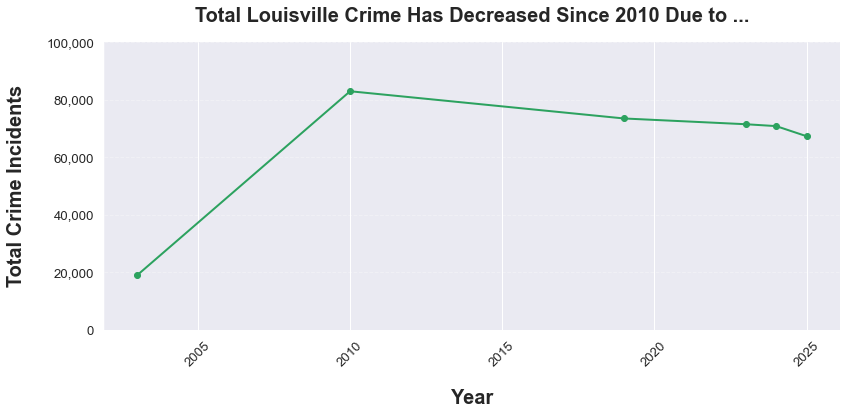

In [716]:
# Some chart stlying is inherited from seaborn styling template earlier in the code e.g. the blueish/grey chart bg.

plt.figure(figsize=(12, 6))
plt.plot(crimes_by_year.index,
         crimes_by_year.values,
         marker = "o",
         linestyle = "-",
         color = "#2ca25f",
         linewidth = 2)

plt.xlabel("Year", fontsize=20, labelpad=20, fontweight='bold')
plt.ylabel("Total Crime Incidents", labelpad=20,fontsize=20, fontweight='bold')
plt.title("Total Louisville Crime Has Decreased Since 2010 Due to ...", fontweight='bold',fontsize=20, pad=20)
plt.xticks(rotation=45)

plt.grid(axis='y', alpha=0.3, linestyle='--')
plt.ylim(0,100_000)

ax = plt.gca()
for spine in ax.spines.values():
    spine.set_linewidth(0.5)
    spine.set_alpha(0.5)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

# I looked this up
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{int(x):,}'))

plt.tight_layout()
plt.show()